Question 1. (100pts) 
Assuming we are using the function, f(x) = ax2 + bx + c

1) Use Closed-form method to solve for a, b, c.
2) Plot out the scatter plot of the data and your f(x).

closed form regression's w vector: 
 [[ 1.06623954]
 [-0.58165109]
 [ 4.01338366]]


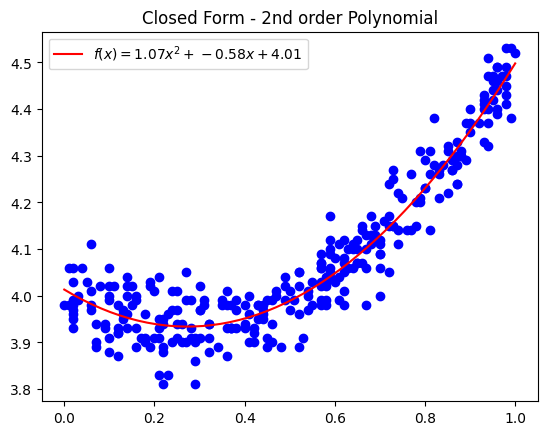

In [6]:
## PROBLEM 1
import numpy as np 
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


X = np.reshape(genfromtxt('problem_1_data.csv', delimiter='\n'), (-1,1))
y = np.reshape(genfromtxt('problem_1_label.csv', delimiter='\n'), (-1,1))

Φ = np.hstack((X*X, X, np.ones((len(X), 1))))
phi = PolynomialFeatures(2).fit_transform(X)

## using closed form
w = np.linalg.inv(Φ.T.dot(Φ)).dot(Φ.T.dot(y))
print("closed form regression's w vector: \n", w)


## plotting the data and f(x)
xp = np.linspace(0, 1)
fₓ = w[0]*xp*xp + w[1]*xp + w[2]
plt.plot(xp, fₓ, color='red', label=f'$f(x) = {w[0][0]:.2f}x^2 + {w[1][0]:.2f}x + {w[2][0]:.2f}$')
plt.legend()
plt.title('Closed Form - 2nd order Polynomial')
plt.scatter(X[:, 0], y[:, 0], color = 'blue')
plt.show()


Question 2. (100pts) Load the following files
problem_2_data.csv
problem_2_label.csv
1) Split the data into train, validation, test.
2) Center and Scale the data.
3) Use gradient descent to train both linear and 2nd-order polynomial models.
- Show the plot of MSE going down as you step through gradient descent.
- Print out the final MSE for both models on training, validation, and test?
- Which model would you pick?

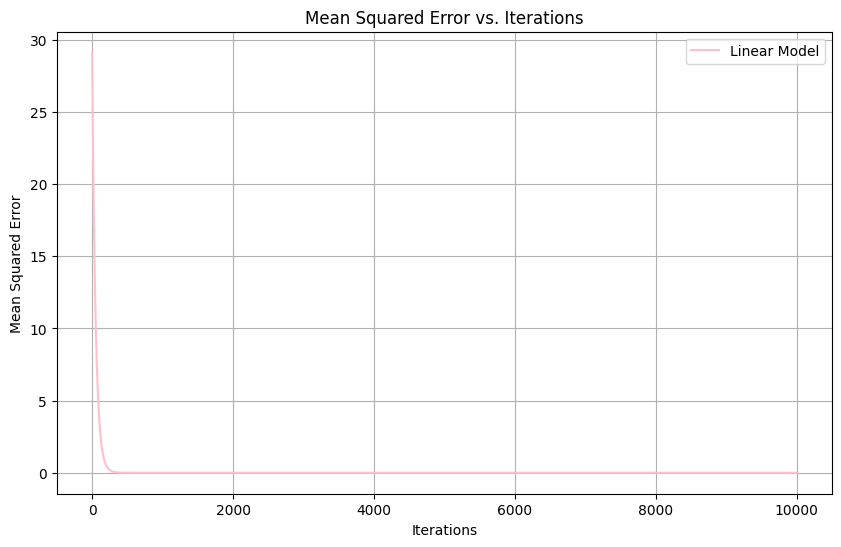

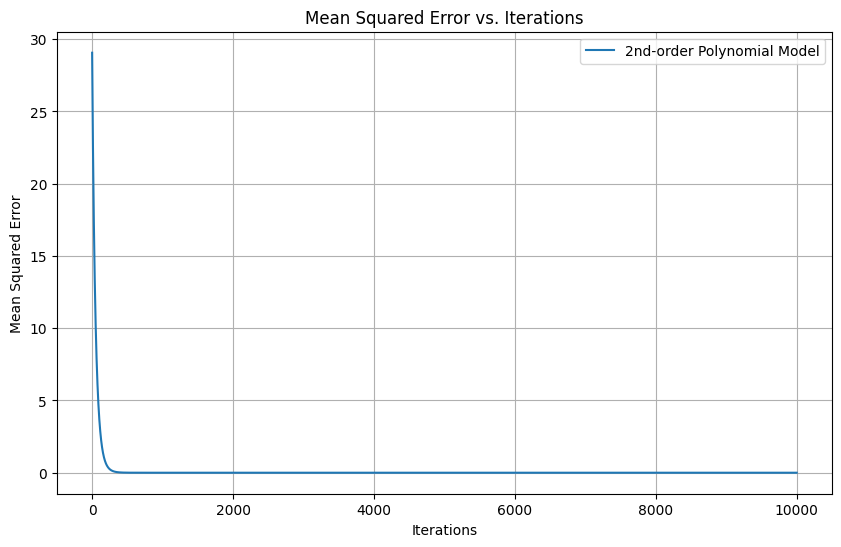

Linear Model:
MSE on training set: 0.011247126219733974
MSE on validation set: 0.008979452125422333
MSE on test set: 0.0095285272540715
2nd-order Polynomial Model:
MSE on training set: 0.0024430921943071854
MSE on validation set: 0.002160539993147957
MSE on test set: 0.001972133912591055


In [7]:
## PROBLEM 2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression as SKLinearRegression
import matplotlib.pyplot as plt
import numpy as np

X = np.genfromtxt('problem_2_data.csv', delimiter=',')
y = np.genfromtxt('problem_2_label.csv', delimiter=',')
y = y.reshape(-1, 1)

## 80 / 10 / 10 split into train, validate, and test sets
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest, test_size=0.5)

# centering and scaling the data 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## calc mse given actual y and predited y 
def calc_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

## grad desc
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    f_value_list = []
    for _ in range(iterations):
        gradient = 1/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradient
        y_pred = X.dot(theta)
        mse = calc_mse(y, y_pred)
        f_value_list.append(mse)
    return theta, f_value_list



poly = PolynomialFeatures(degree= 2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)


theta_linear = np.zeros((X_train.shape[1], 1))
theta_poly = np.zeros((X_train_poly.shape[1], 1))

iters = 10000

# linear -> run grad desc
theta_linear, mse_history_linear = gradient_descent(X_train, y_train, theta_linear, 0.01, iters)
# poly -> run grad desc
theta_poly, mse_history_poly = gradient_descent(X_train_poly, y_train, theta_poly, 0.01, iters)

plt.figure(figsize=(10, 6))
plt.plot(range(iters), mse_history_linear, label='Linear Model', color = "pink")
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(iters), mse_history_poly, label='2nd-order Polynomial Model')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()


y_pred_train_linear = X_train.dot(theta_linear)
y_pred_val_linear = X_val.dot(theta_linear)
y_pred_test_linear = X_test.dot(theta_linear)

y_pred_train_poly = X_train_poly.dot(theta_poly)
y_pred_val_poly = X_val_poly.dot(theta_poly)
y_pred_test_poly = X_test_poly.dot(theta_poly)

mse_train_linear = calc_mse(y_train, y_pred_train_linear)
mse_val_linear = calc_mse(y_val, y_pred_val_linear)
mse_test_linear = calc_mse(y_test, y_pred_test_linear)

mse_train_poly = calc_mse(y_train, y_pred_train_poly)
mse_val_poly = calc_mse(y_val, y_pred_val_poly)
mse_test_poly = calc_mse(y_test, y_pred_test_poly)

print("Linear Model:")
print("MSE on training set:", mse_train_linear)
print("MSE on validation set:", mse_val_linear)
print("MSE on test set:", mse_test_linear)

print("2nd-order Polynomial Model:")
print("MSE on training set:", mse_train_poly)
print("MSE on validation set:", mse_val_poly)
print("MSE on test set:", mse_test_poly)


For Problem 2, I would pick the 2nd Order Polynomial Model as it has a low error (meaning it accurately predicts the data) and seems to generalize well, as it has a low train and validation mse, meaning the model was accurate on predicting data it hadn't seen before. 

Question 3. (150pts)
This file consists of 200 people recording the amount of time they waited in line until they got to order their lunch.
Use the 200 samples as {x1, x2, ..., x200} in the minimization problem given. 
1) Solve for the closed-form solution for θ.

2) Run Gradient Descent to minimize this objective and find θ.

3) Find the population mean, variance, and standard deviation for this dataset.

In [8]:
## PROBLEM 3
import numpy as np

X = np.genfromtxt('lunch_wait_time.csv', delimiter='\n')

# objective function
def objective_function(theta, wait_times):
    n = len(wait_times)
    return -n * np.log(theta) + theta * np.sum(wait_times)

# derivative of objective function
def derivative(theta, wait_times):
    n = len(wait_times)
    return -n / theta + np.sum(wait_times)


## PART 1 - CLOSED FORM

# derivative set to 0 and solved for theta:  theta = n / sum(wait_times)
theta_closedform = len(X) / np.sum(X)
print ("theta from closed form:", theta_closedform )


## PART 2 - GRADIENT DESCENT 
learning_rate = 0.001
iters = 1000
theta = 1

for _ in range(iters):
    # update theta
    theta -= learning_rate * derivative(theta, X)
    
print("theta from gradient descent:", theta)

## PART 3  - POPULATION MEAN, VARIANCE, AND STD DEV

# expected value / population mean
population_mean = (1/ len(X)) * np.sum(X)
print("population_mean: ", population_mean)

# variance
variance = (1/len(X)) * np.sum((X - population_mean)**2)
print("population variance:", variance)

# std dev 
stddev = np.sqrt(variance)
print("population standard deviation:", stddev)



theta from closed form: 0.9610764055742432
theta from gradient descent: 0.9610764055742433
population_mean:  1.0405
population variance: 1.0283297500000002
population standard deviation: 1.0140659495318833


Question 4. (150pts) Given A and y, solve the minimization problem
min w for (Aw − y)^2
1) Using Gradient descent.
2) Using the closed-form solution.

In [9]:
## PROBLEM 4 
import numpy as np

A = np.array([[1,1,1], [4,2,1], [9,3,1], [16, 4, 1]])
y = np.array([[2], [4], [8], [14]])
w = np.array([[1], [1], [1]]) 


# GRADIENT DESCENT 
learning_rate = 0.001
iters = 100000

def f(w):
	p = (np.dot(A,w) - y)
	return np.dot(np.transpose(p), p).item()

def derivative(w):
    return 2*A.T.dot(A.dot(w) - y) 

f_value_list = []

for _ in range(iters):
    w = w - (learning_rate * derivative(w))
    f_value_list.append(f(w))

print("Gradient Descent Solution for w:\n", w)

# CLOSED FORM
w_closed_form = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
print ("Closed Form Solution:\n", w_closed_form)

Gradient Descent Solution for w:
 [[ 0.99999982]
 [-0.99999904]
 [ 1.99999894]]
Closed Form Solution:
 [[ 1.]
 [-1.]
 [ 2.]]
